In [1]:
import pandas as pd
import gradio as gr
from colormap import rgb2hex
import plotly.express as px
import re
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
import pickle

In [2]:
df = pd.read_csv('dataset.csv')
df['hex'] = df.apply(lambda x: rgb2hex(int(x.r_a), int(x.g_a), int(x.b_a)), axis=1)
df['percent_mar'] = df.v_m / 15
df['percent_kur'] = df.v_k / 15
df['percent_buz'] = df.v_b / 15

In [3]:
df

,m_cloth,v_w,v_m,v_k,v_b,m_al,m_cu,m_fe,m_tan,time,...,r_2,g_2,b_2,r_3,g_3,b_3,hex,percent_mar,percent_kur,percent_buz
0,0.12,7.5,7.5,0.0,0.0,0.0,0.0,0.0,0.0,5,...,185,141,140,180,144,145,#B58E8E,0.500000,0.000000,0.000000
1,0.13,7.5,7.5,0.0,0.0,0.0,0.0,0.0,0.0,15,...,185,150,154,186,148,149,#BA9497,0.500000,0.000000,0.000000
2,0.14,7.5,7.5,0.0,0.0,0.0,0.0,0.0,0.0,30,...,184,143,146,182,138,142,#B78C90,0.500000,0.000000,0.000000
3,0.12,7.5,7.5,0.0,0.0,0.0,0.0,0.0,0.0,60,...,182,142,147,180,140,148,#B58C92,0.500000,0.000000,0.000000
4,0.12,7.5,7.5,0.0,0.0,0.0,0.0,0.0,0.0,120,...,177,139,143,174,137,142,#B0898D,0.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.08,7.5,0.0,0.0,7.5,0.0,0.0,0.0,0.0,30,...,190,191,190,189,190,190,#BDBEBD,0.000000,0.000000,0.500000
244,0.07,7.5,0.0,0.0,7.5,0.0,0.0,0.0,0.0,60,...,189,189,184,189,188,183,#BCBCB7,0.000000,0.000000,0.500000
245,0.07,0.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,10,...,178,150,115,182,154,123,#B49877,0.333333,0.333333,0.333333
246,0.07,0.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,30,...,180,146,112,181,146,115,#B49270,0.333333,0.333333,0.333333


In [4]:
fig = px.scatter(df, x="percent_mar", y="percent_kur", color = 'hex', color_discrete_sequence=df['hex'], width=1200, height=1000, labels={
                     "percent_mar": "Red dye, proportion",
                     "percent_kur": "Yellow dye, proportion",
                     'percent_buz': "Black dye, proportion"
                 },
                title="Conducted experiments for three-dye system")
fig.show()

In [5]:
fig = px.scatter_3d(df, x="percent_mar", y="percent_kur", z = 'percent_buz', color = 'hex', color_discrete_sequence=df['hex'], width=1200, height=1000, labels={
                     "percent_mar": "Red dye, proportion",
                     "percent_kur": "Yellow dye, proportion",
                     'percent_buz': "Black dye, proportion"
                 },
                title="Conducted experiments for three-dye system")
fig.show() # Вывести фигуру

In [6]:
df = df.drop(labels=[25, 35, 45, 61, 65, 83, 193, 224], axis=0).reset_index(drop=True)

In [7]:
df

,m_cloth,v_w,v_m,v_k,v_b,m_al,m_cu,m_fe,m_tan,time,...,r_2,g_2,b_2,r_3,g_3,b_3,hex,percent_mar,percent_kur,percent_buz
0,0.12,7.5,7.5,0.0,0.0,0.0,0.0,0.0,0.0,5,...,185,141,140,180,144,145,#B58E8E,0.500000,0.000000,0.000000
1,0.13,7.5,7.5,0.0,0.0,0.0,0.0,0.0,0.0,15,...,185,150,154,186,148,149,#BA9497,0.500000,0.000000,0.000000
2,0.14,7.5,7.5,0.0,0.0,0.0,0.0,0.0,0.0,30,...,184,143,146,182,138,142,#B78C90,0.500000,0.000000,0.000000
3,0.12,7.5,7.5,0.0,0.0,0.0,0.0,0.0,0.0,60,...,182,142,147,180,140,148,#B58C92,0.500000,0.000000,0.000000
4,0.12,7.5,7.5,0.0,0.0,0.0,0.0,0.0,0.0,120,...,177,139,143,174,137,142,#B0898D,0.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.08,7.5,0.0,0.0,7.5,0.0,0.0,0.0,0.0,30,...,190,191,190,189,190,190,#BDBEBD,0.000000,0.000000,0.500000
236,0.07,7.5,0.0,0.0,7.5,0.0,0.0,0.0,0.0,60,...,189,189,184,189,188,183,#BCBCB7,0.000000,0.000000,0.500000
237,0.07,0.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,10,...,178,150,115,182,154,123,#B49877,0.333333,0.333333,0.333333
238,0.07,0.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,30,...,180,146,112,181,146,115,#B49270,0.333333,0.333333,0.333333


In [8]:
df.v_w = df.v_w / 15
df.v_k = df.v_k / 15
df.v_b = df.v_b / 15
df.v_m = df.v_m / 15

In [9]:
whites = df.loc[20:25,:].copy()
whites.v_w = 15
whites.v_m = 0
whites.v_k = 0
whites.v_b = 0
whites.r_a = 200
whites.b_a = 200
whites.g_a = 200

df = pd.concat([df, whites]).reset_index(drop=True)

X = df.iloc[:,:11]
y = df.iloc[:,11:14]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42, shuffle=True)

In [10]:
# create model instance
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=1, colsample_bytree = 0.7, subsample = 0.7)
# fit model
xgb.fit(X_train, y_train)
# make predictions
preds = xgb.predict(X_test)

In [11]:
xgb.score(X_train, y_train)

0.9998780080248153

In [12]:
xgb.score(X_test, y_test)

0.8169240202971476

In [13]:
pickle.dump(xgb, open('xgb.ckpt', 'wb'))

In [14]:
feature_importance = xgb.get_booster().get_score(importance_type='gain')

In [15]:
keys = list(feature_importance.keys())
values = list(feature_importance.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data['x'] = data.index
data.x = ["Volume of turmeric dye solution, ml", "Volume of elderberry dye solution, ml", 'Weight of added iron salt, g', 'Volume of madder dye solution, ml', 'Weight of added aluminum salt, g', 'Water volume, ml', 'Dyeing time, min', 'Weight of fabric, g', 'Weight of added copper salt, g', 'pH', 'Weight of added tannin, g']

In [16]:
fig = px.bar(data.iloc[::-1], y='x', x='score', orientation='h', width = 1000, height = 500, labels={'x': 'Dying parameters', 'score': 'Feature importance score'}, color = 'score')
fig.show()

In [17]:
kur_list = []
mar_list = []
water_list = []
for kur in range(10, 151, 5):
  for mar in range(10, 151 - kur, 5):
    water = (150 - kur - mar) / 150
    kur_list.append(kur / 150)
    mar_list.append(mar / 150)
    water_list.append(water)

In [18]:
X_fill = pd.DataFrame({'m_cloth': 0.1, 'v_w': water_list, 'v_m': mar_list, 'v_k': kur_list, 'v_b': 0, 'm_al': 0, 'm_cu': 0, 'm_fe': 0, 'm_tan': 0, 'time': 5, 'pH': 6})

y_fill = xgb.predict(X_fill)
df_fill = X_fill

In [19]:
df_fill['r_a'] = y_fill[:,0]
df_fill['g_a'] = y_fill[:,1]
df_fill['b_a'] = y_fill[:,2]

df_fill['hex'] = df_fill.apply(lambda x: rgb2hex(int(x.r_a), int(x.g_a), int(x.b_a)), axis=1)

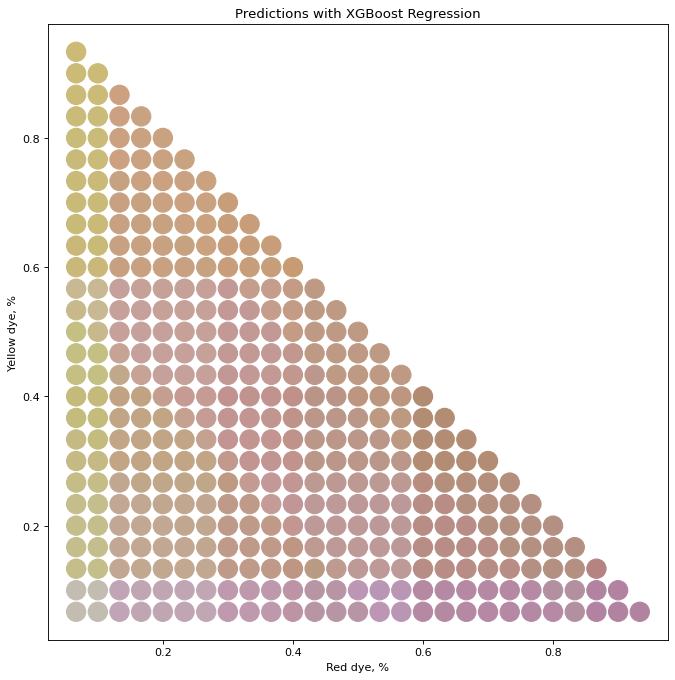

In [20]:
figure(figsize=(10, 10), dpi=80)
ax = plt.gca()
ax.set_facecolor('white')
plt.title('Predictions with XGBoost Regression')
plt.xlabel('Red dye, %')
plt.ylabel('Yellow dye, %')
plt.scatter(df_fill.v_m, df_fill.v_k, c=df_fill.hex, s = 300)
#plt.scatter(df_fill.percent_mar, df_fill.percent_kur, c=df_fill.hex, s = 1000, marker = '$◣$')
#plt.scatter(colors.Yellow, colors.Red, c=colors[['r', 'g', 'b']].to_numpy(), s = 1000)

In [21]:
def predict(m_cloth, v_w, v_m, v_k, v_b, m_al, m_cu, m_fe, m_tan, time, pH):
  v_sum = v_w + v_m + v_k + v_b
  X = pd.DataFrame({'m_cloth': m_cloth, 'v_w': v_w / v_sum, 'v_m': v_m / v_sum, 'v_k': v_k / v_sum, 'v_b': v_b / v_sum, 'm_al': m_al, 'm_cu': m_cu, 'm_fe': m_fe, 'm_tan': m_tan, 'time': time, 'pH': pH}, index = [0])
  y = xgb.predict(X)
  r, g, b = y[0]
  img = Image.new('RGB',(200,200),(int(r),int(g),int(b)))
  hex_color = rgb2hex(int(r), int(g), int(b))
  return hex_color, int(r), int(g), int(b), hex_color, img

In [22]:
def compare_experiments(index):
  args_dict = df.loc[index,'m_cloth':'pH'].to_dict()
  _, r_pred, g_pred, b_pred, _, image_predicted = predict(**args_dict)

  r, g, b = df.loc[index,'r_a':'b_a'].values
  image_real = Image.new('RGB',(200,200),(int(r),int(g),int(b)))

  return image_real, image_predicted, r_pred, g_pred, b_pred, r, g, b

In [23]:
image_real, image_predicted, r_pred, g_pred, b_pred, r, g, b = compare_experiments(193)

In [24]:
r2_score([r_pred, g_pred, b_pred], [r, g, b])

0.900720270270271

### Service

In [26]:
with gr.Blocks() as demo:
  with gr.Column():
    gr.Markdown(
      """
      # Predicting the conditions of dyeing of cotton fabric with natural dyes to obtain a given color
      """)
    with gr.Row():
      with gr.Column(scale=4):
        gr.Markdown(
        """
        This service was created as part of the project **"Predicting the conditions of dyeing of cotton fabric with natural dyes to obtain a given color"** under the **Sirius.Leto** program. The purpose of this service is to determine in advance the result of dyeing the fabric with natural dyes, without conducting experiments. This is achieved by using the **Extreme Gradient Boosting Regressor** model, which allows to predict the color in **RGB** format based on the initial dyeing parameters.

        To build this model, **240** fabric dyeing experiments were conducted at **ITMO University**. These experiments formed the dataset on which the models were built with **R<sup>2</sup> = 0.82** on the test set. Additionally, **8** experiments close but different from the experiments in the original dataset were performed, on which the algorithm was validated. The accuracy on the validation set was **R<sup>2</sup> = 0.88**.

        Dataset, code and detailed slides: **TBA**.

        Limitations of the algorithm's performance:


        *   Limited palette of colors for which high prediction accuracy is preserved (see *Figure 1*)
        *   Limited investigation of the influence of additional factors such as additives, pH, temperature (many of these parameters are less likely to determine the final color)
        *   As in many machine learning models, borderline values with less data are predicted worse (e.g. in the case of very dilute solutions)

        Authors:
        Ekaterina Veselyaeva \*,
        Alisa Pigulevskaya \*,
        Sofia Ryakhovskaya \*.

        Supervisor:
        Ivan Dubrovsky \*\*.

        \* Lyceum № 226, St. Petersburg

        \*\* Artificial Intelligence in Chemistry Center, ITMO University, St. Petersburg
        """)
      with gr.Column(scale=3):
        gr.Image("Color_circle.png", height = 500, width = 500)
        gr.Markdown("""
            *Figure 1. A palette of colors that the algorithm is able to predict with high accuracy (mostly the colors of the original dyes and their combinations).*
        """)
  with gr.Row():
    with gr.Column(scale=4):
      inp= [gr.Number(label = 'Weight of fabric, g', minimum = 0, maximum = 1000, value = 0.1),
            gr.Number(label = 'Water volume, ml', minimum = 0, maximum = 1000, value = 5),
            gr.Number(label = 'Volume of madder dye solution, ml', minimum = 0, maximum = 1000, value = 5),
            gr.Number(label = 'Volume of turmeric dye solution, ml', minimum = 0, maximum = 1000, value = 5),
            gr.Number(label = 'Volume of elderberry dye solution, ml', minimum = 0, maximum = 1000),
            gr.Number(label = 'Weight of added aluminum salt, g', minimum = 0, maximum = 1000),
            gr.Number(label = 'Weight of added copper salt, g', minimum = 0, maximum = 1000),
            gr.Number(label = 'Weight of added iron salt, g', minimum = 0, maximum = 1000),
            gr.Number(label = 'Weight of added tannin, g', minimum = 0, maximum = 1000),
            gr.Number(label = 'Dyeing time, min', minimum = 0, maximum = 5000, value = 60),
            gr.Number(label = 'pH', minimum = 0, maximum = 14, value = 6)]
    with gr.Column(scale=3):
      out = [gr.ColorPicker(label="Color"),
             gr.Number(label = 'R', minimum = 0, maximum = 255),
             gr.Number(label = 'G', minimum = 0, maximum = 255),
             gr.Number(label = 'B', minimum = 0, maximum = 255),
             gr.Textbox(label="Hexadecimal color"),
             gr.Image(label="Color image", height = 500, width = 500)]
  button = gr.Button()
  button.click(fn=predict, inputs=inp, outputs=out)
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
